# Execute the code below

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)


# You have now a DataFrame with lots of weather data

In [2]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,1037,62.250,9,6,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,1040,58.125,8,6,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,1040,37.000,6,1,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,1040,42.625,5,1,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,1040,17.250,6,2,-2,143,116,116,0,1,8.7,very bad,1,5


# Now, complete the following tasks :

## First of all, you have to create a scatterplot with max (in red) and min (in blue) temperatures located on the same graph

There are lots of colors to chose from here : https://python-graph-gallery.com/100-calling-a-color-with-seaborn/

Create a scatterplot :
- with max (in red) and min (in blue) temperatures on the same graph
- Y-axis for temperatures
- X-axis for dates
- Include legend, readable axis ticks, and title

Here is an example of what is expected :

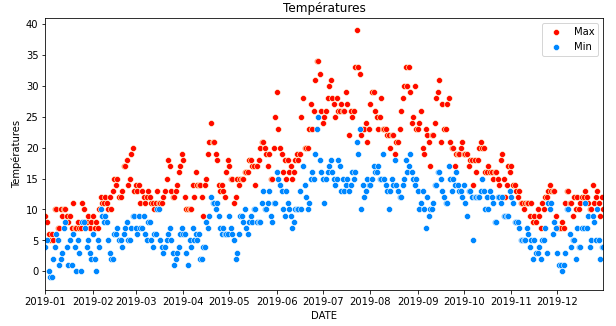


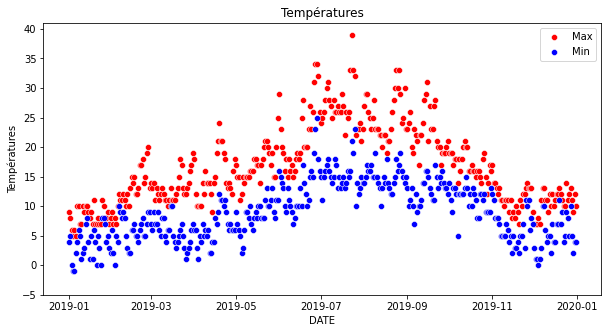

In [3]:
# Of course, you'll add legend, readable axis ticks, and title (there is no seaborn function for that, use matplotlib syntax)
# It's up to you:

plt.figure(figsize=(10, 5))

sns.scatterplot(data = df_weather,
                x = pd.to_datetime(df_weather['DATE']),
                y = 'MAX_TEMPERATURE_C',
                color = 'red',
                label = 'Max')

sns.scatterplot(data = df_weather,
                x = pd.to_datetime(df_weather['DATE']),
                y = 'MIN_TEMPERATURE_C',
                color = 'blue',
                label = 'Min')

plt.legend()
plt.title('Températures')
plt.ylabel('Températures')
plt.yticks(range(-5,45,5))

plt.show()

## Colorize with hue argument, to show the criterias of the opinion columns

With Seaborn, you can use the "data" argument to indicate your DataFrame, syntax will be prettier.

Here is an example of what is expected :

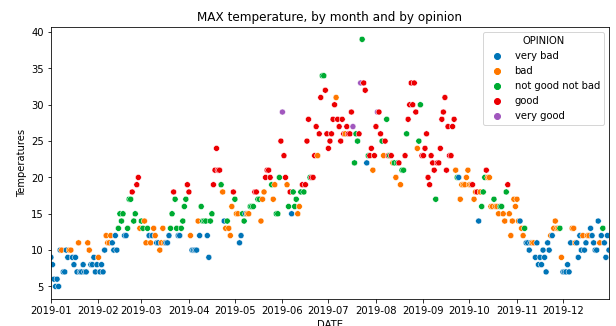

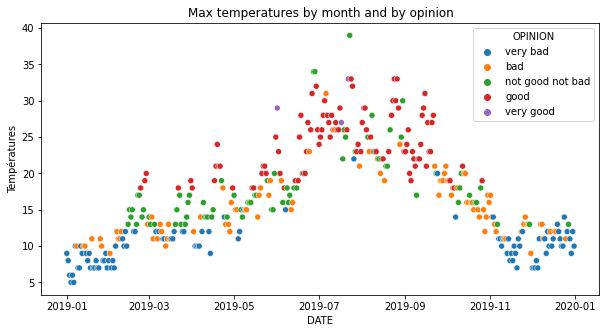

In [4]:
# Of course, you'll add legend, readable axis ticks, and title (there is no seaborn function for that, use matplotlib syntax)
# It's up to you:
plt.figure(figsize=(10, 5))

sns.scatterplot(data = df_weather,
                x = pd.to_datetime(df_weather['DATE']),
                y = 'MAX_TEMPERATURE_C',
                hue = 'OPINION')

plt.legend(title='OPINION')
plt.title('Max temperatures by month and by opinion')
plt.ylabel('Températures')

plt.show()


## Correlation coefficient and heatmap - change the palette and interpretation

For more information : https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/





What does it mean ? Could you interpret this ?

***représente les corrélations entre les différentes colonnes du dataframe***

Why the diagonal value is `1` ? 

***parce qu'une colonne est 100% corrélée avec elle même***

And why there is a blank column and a blank row ?

**toutes les valeurs de la colonne 'TOTAL_SNOW_MM' sont égale à zéro donc le calcul du coef de corrélation est toujours égal à 0**


Could you find the less correlated columns ? Be careful : the less correlated columns are those with a correlated coefficient close to 0, not -1. 
***Toutes celles associées à des carrés blancs ou gris.***

Let's modify it to be more readable.
Please change the palette (`cmap`) to a more beautiful one. Chose a "diverging" palette in this page https://seaborn.pydata.org/tutorial/color_palettes.html and `center` it on 0.



Here is an example of what is expected (but you can improve colors) :

![ ](https://storage.googleapis.com/quest_editor_uploads/Ci9AZJdBsnuTx7z8XuZRTbvoCi3uON5r.png)

Then, please add a title of course.

Try to interpret it : which columns are most correlated with MAX Temperature ? Positively and negatively ? Do you think it's logical ?

***Positively : TEMPERATURE_NOON / TEMPERATURE_EVENING / HEATINDEX_MAX / WINDTEMP_MAX***

***Negatively : HUMIDITY_MAX***

***Oui, normal que les températures le matin et le soir, le heatindex et la teméprature du vent soit élevées lorsque que la température max est élevée***

***Et normal que l'humidité diminue quand la température est élevée (sauf dans les climats chauds et humides)***


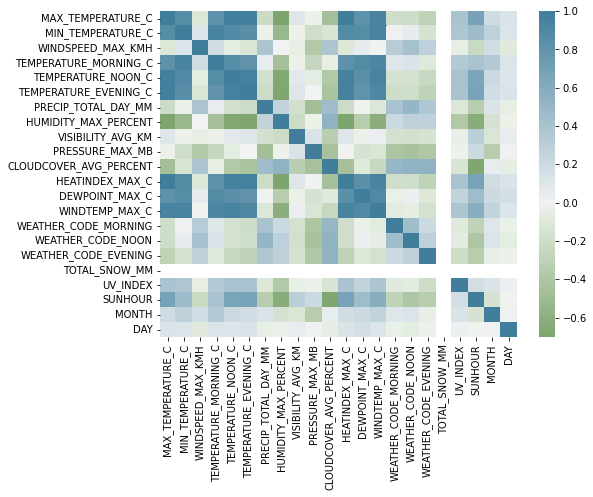

In [5]:
plt.figure(figsize=(8, 6))

sns.heatmap(df_weather.corr(),
            cmap =sns.diverging_palette(120, 230, as_cmap=True),
            center = 0)

plt.show()

## Pair Plot - Colorize the opinions
Another way, and more visual way, to see correlation, is just to plot each column 2 by 2, that's a pairplot. But it's slow to compute on the whole dataset.

- Creates a slice of 10 columns (including the "OPINION" column)
- Creates a sample of this slice
- Draw a Pairplot on this sample, and colorize it by `OPINION`

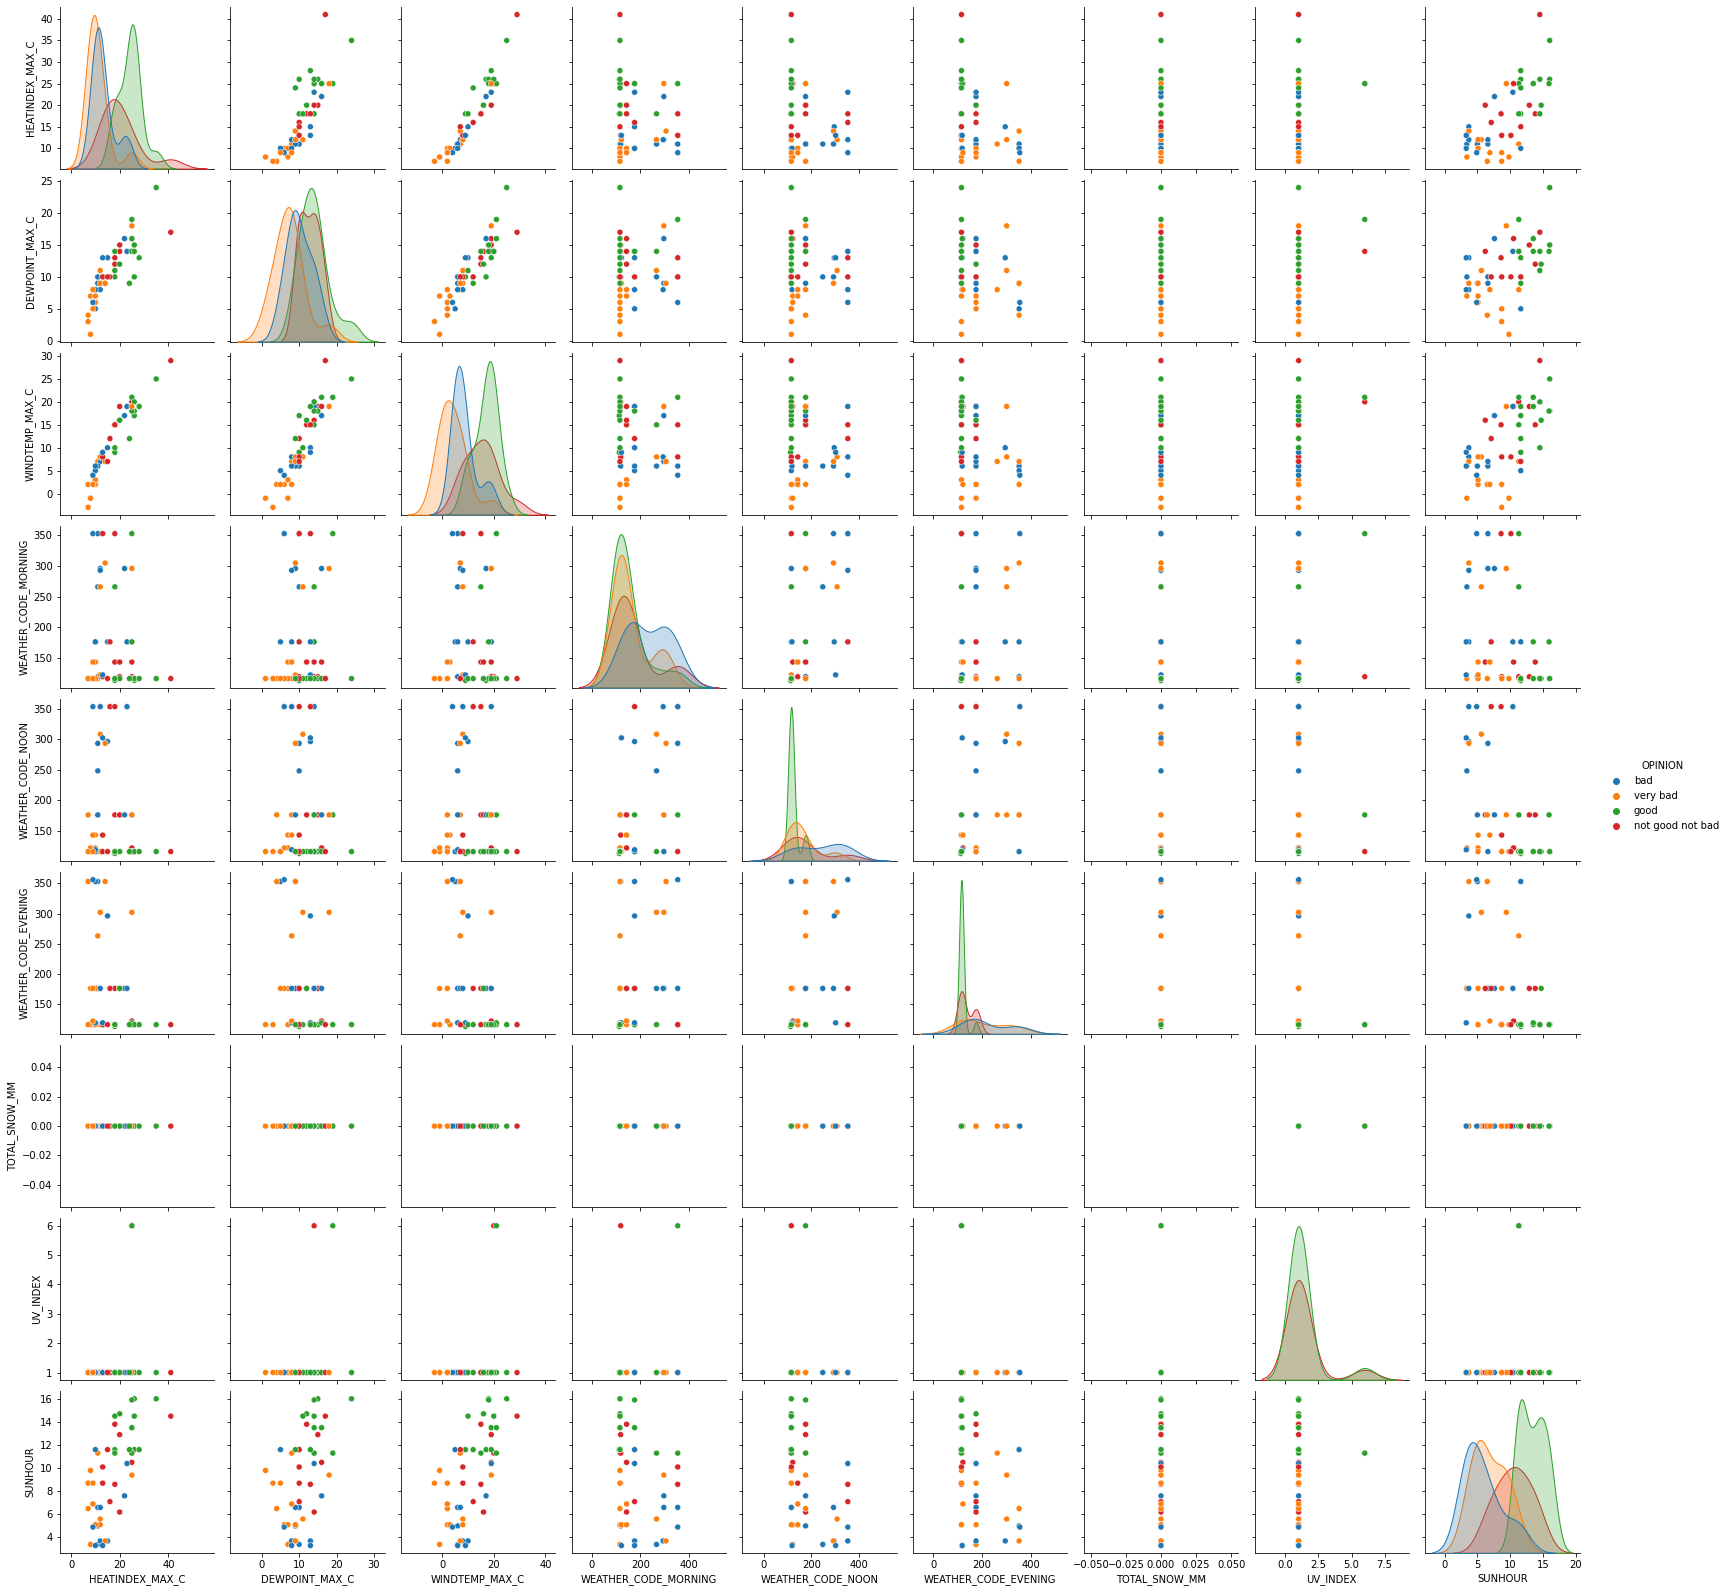

In [6]:
# It's your turn:
df_sample = df_weather.iloc[:,-12:-2].sample(n = 50)
sns.pairplot(data = df_sample,
             hue = 'OPINION')
plt.show()

## Linear regression

With `regplot`, you can plot a regresion line. It's very simple, but here, it's not very adapted, because our 2 columns seems not correlated. But you know lots of correlated columns with MAX Temperature.
Replace the X-axis with a positively correlated columns, then plot another regplot with a negative correlation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


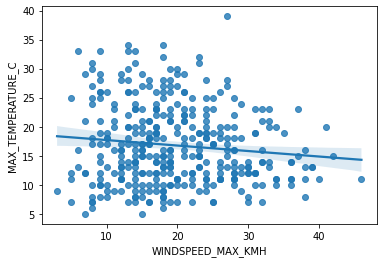

In [7]:

sns.regplot('WINDSPEED_MAX_KMH', 'MAX_TEMPERATURE_C', data = df_weather)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


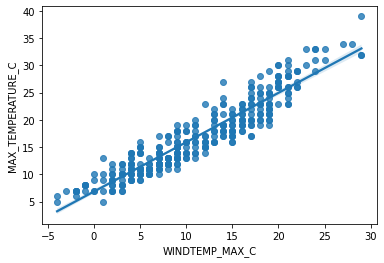

In [8]:
# Display a regplot with a positive correlation:

sns.regplot('WINDTEMP_MAX_C', 'MAX_TEMPERATURE_C', data = df_weather)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


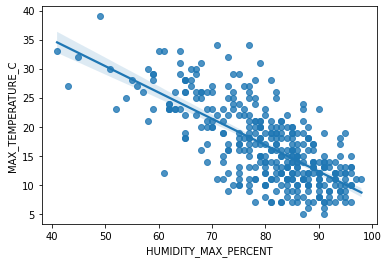

In [9]:
# Display a regplot with a negative correlation:
sns.regplot('HUMIDITY_MAX_PERCENT', 'MAX_TEMPERATURE_C', data = df_weather)
plt.show()

# More and more...
Draw 4 different charts of your choice (you're an analyst, you have to be force of proposal), on the same figure, to represent which season has the best weather.

In [10]:
df_weather


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.000,1037,62.250,9,6,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.000,1040,58.125,8,6,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.000,1040,37.000,6,1,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.000,1040,42.625,5,1,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.000,1040,17.250,6,2,-2,143,116,116,0,1,8.7,very bad,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,13,10,13,10,12,11,0.0,96,7.375,1033,57.625,13,10,8,119,143,116,0,1,8.7,not good not bad,12,27
361,2019-12-28,11,5,12,7,8,8,0.0,93,7.625,1035,39.500,11,9,4,143,116,116,0,1,6.9,very bad,12,28
362,2019-12-29,9,2,11,3,6,7,0.0,86,10.000,1034,4.000,9,4,0,116,116,116,0,1,8.7,very bad,12,29
363,2019-12-30,12,4,7,5,9,9,0.0,61,10.000,1033,1.875,12,4,4,113,113,113,0,1,8.7,very bad,12,30


In [11]:
def season2019(date):
  if '2019-03-21' <= date < '2019-06-21':
    return 'Spring'
  elif '2019-06-21' <= date < '2019-09-21':
    return 'Summer'
  elif '2019-09-21' <= date < '2019-12-21':
    return 'Automn'
  elif '2019-01-01' <= date < '2019-03-21' or '2019-12-21' <= date <= '2019-12-31':
    return 'Winter'

df_weather['SEASON'] = df_weather['DATE'].apply(season2019)

In [12]:
df_weather['DATE']=pd.to_datetime(df_weather['DATE'])

In [13]:
pivotOpinion = df_weather.pivot_table(index = 'SEASON', columns ='OPINION', values='DATE', aggfunc = 'count')
pivotOpinion = pivotOpinion[['very good','good','not good not bad', 'bad', 'very bad']]
pivotOpinion

OPINION,very good,good,not good not bad,bad,very bad
SEASON,,,,,
Automn,NaN,5.0,10.0,44.0,32.0
Spring,1.0,24.0,34.0,19.0,14.0
Summer,3.0,61.0,18.0,9.0,1.0
Winter,NaN,3.0,14.0,22.0,51.0


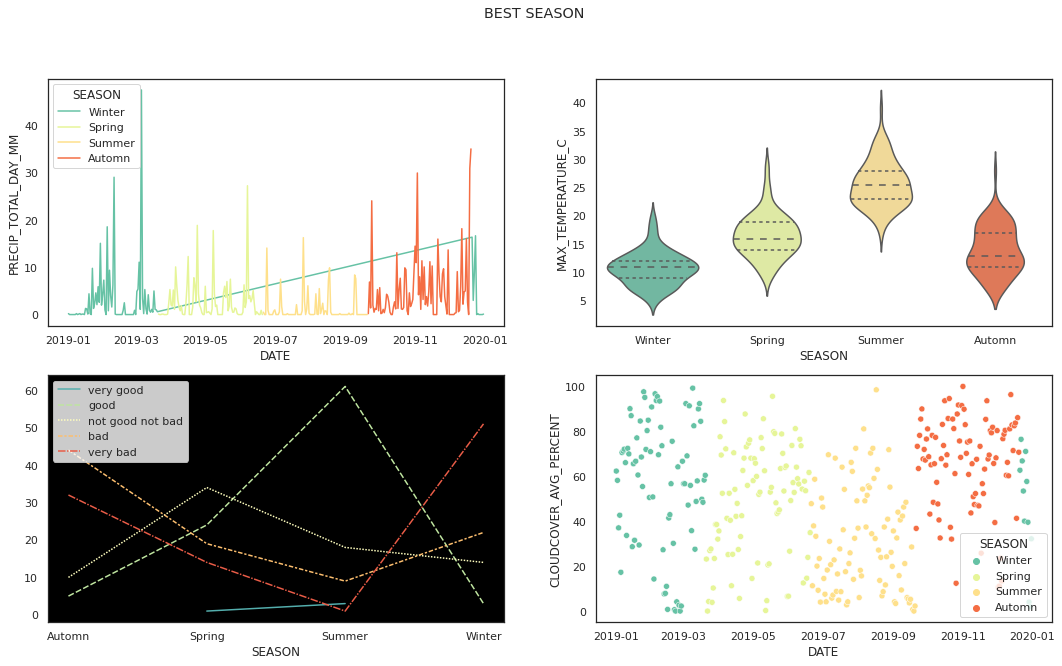

In [14]:
# Your code here

sns.set_theme(style = 'white')
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('BEST SEASON')

#1er graph
sns.lineplot(ax=axes[0, 0], 
             data=df_weather, 
             x='DATE', 
             y= 'PRECIP_TOTAL_DAY_MM', 
             hue='SEASON', 
             palette='Spectral_r')
#2eme graph
sns.violinplot(ax = axes[0,1], 
               data = df_weather,
               x = "SEASON", 
               y = "MAX_TEMPERATURE_C",
               inner = "quartile",
               palette = 'Spectral_r')
#3ème graph
sns.lineplot(ax=axes[1,0], 
             data = pivotOpinion,
             palette = 'Spectral_r')
axes[1,0].legend(loc='upper left')
axes[1,0].patch.set_facecolor('black')


#4eme graph
sns.scatterplot(ax=axes[1, 1], 
             data=df_weather, 
             x='DATE', 
             y= 'CLOUDCOVER_AVG_PERCENT', 
             hue='SEASON', 
             palette='Spectral_r')
plt.show()

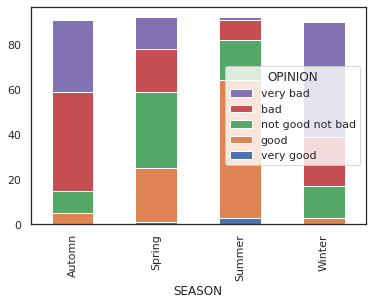

In [15]:
# si quelqu'un sait comment faire ça avec Seaborn, je veux bien une démo ;)
pivotOpinion.plot.bar(stacked=True, legend='reverse')


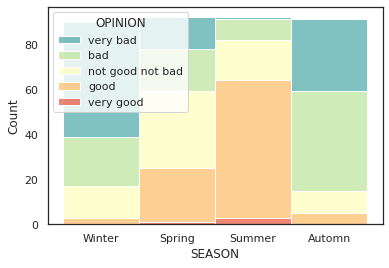

In [27]:
#YOUHOU !
sns.histplot(data = df_weather,
    x="SEASON", hue='OPINION',
    multiple="stack",
    palette="Spectral_r")

# Is it summer? It seems appropriate. :) 

Effectivement, c'est la saison avec le moins de précipitation, les températures les plus hautes, le moins de nuages, et aussi avec la meilleure opinion(le plus de good/very good, le moins de bad/verybad)